In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df=pd.read_csv(r"C:\Users\rames\Downloads\churn_prediction_input.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,Male,34,5,50000.00,2,1,1,70000.00,0
1,1002,Female,45,2,60000.00,1,0,1,80000.00,1
2,1003,Female,23,1,30000.00,1,1,0,30000.00,0
3,1004,Female,42,2,0.00,1,1,1,101348.88,1
4,1005,Female,41,1,83807.86,1,0,1,112542.58,0


In [5]:
df.dtypes

CustomerID           int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [8]:
df.head()

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,1,34,5,50000.00,2,1,1,70000.00,0
1,1002,0,45,2,60000.00,1,0,1,80000.00,1
2,1003,0,23,1,30000.00,1,1,0,30000.00,0
3,1004,0,42,2,0.00,1,1,1,101348.88,1
4,1005,0,41,1,83807.86,1,0,1,112542.58,0


In [9]:
df.drop('CustomerID',axis=1,inplace=True)
df_encoded=pd.get_dummies(df,drop_first=True)
X = df_encoded.drop( 'Exited', axis=1, errors='ignore')
y = df_encoded['Exited']
#the customerID is removed since it is not important column.
#the exited column will be removed from the input category(where model uses to make predictions) and 
#will be assigned to y which contains the output(where model tries to learn and predict) 
X.head()   
y.head()  
 

0    0
1    1
2    0
3    1
4    0
Name: Exited, dtype: int64

In [10]:
#Splitting the dataset into training and testing the data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
model=XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

c:\Users\rames\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:28:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [12]:
print(X_train)

      Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
6123       1   40       7       0.00              1          1   
9072       0   32       4  175406.13              2          1   
2603       0   24      10       0.00              3          1   
6127       1   32       7       0.00              1          0   
1579       0   40       9   95624.36              2          1   
...      ...  ...     ...        ...            ...        ...   
5734       1   45       7  144889.18              1          1   
5191       1   30       4       0.00              3          1   
5390       1   22      10       0.00              2          1   
860        1   39       7  143637.58              2          0   
7270       1   31       9  111589.67              1          1   

      IsActiveMember  EstimatedSalary  
6123               1        141359.11  
9072               1        172792.43  
2603               0        154971.63  
6127               1         79082.62  
1579   

In [13]:
print(y_train)

6123    0
9072    1
2603    1
6127    0
1579    0
       ..
5734    1
5191    0
5390    0
860     0
7270    0
Name: Exited, Length: 7002, dtype: int64


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2394
           1       0.67      0.43      0.53       607

    accuracy                           0.84      3001
   macro avg       0.77      0.69      0.72      3001
weighted avg       0.83      0.84      0.83      3001



<function matplotlib.pyplot.show(close=None, block=None)>

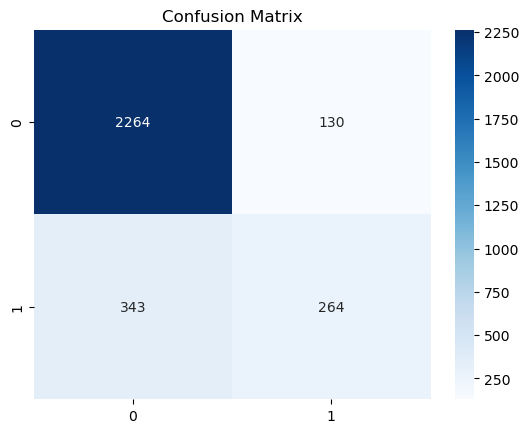

In [14]:
y_pred= model.predict(X_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.show

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2394
           1       0.67      0.43      0.53       607

    accuracy                           0.84      3001
   macro avg       0.77      0.69      0.72      3001
weighted avg       0.83      0.84      0.83      3001



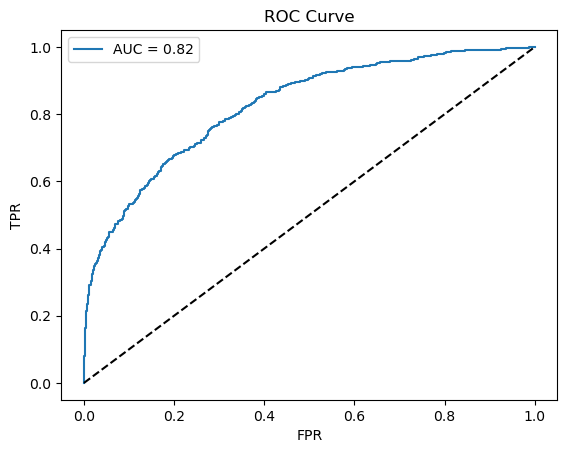

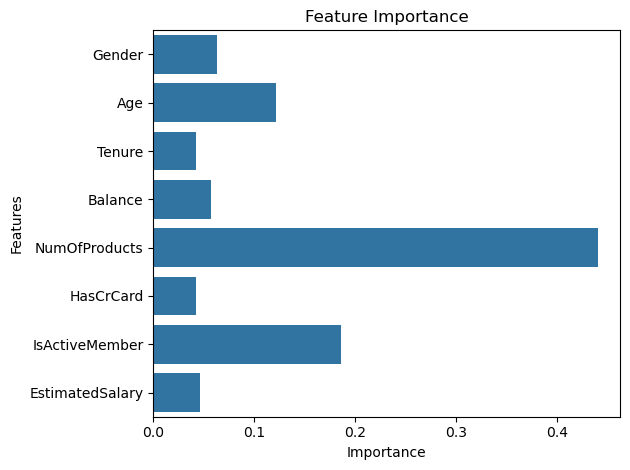

✅ Output saved to final_churn_predictions.csv


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure predictions are 1D
y_pred = model.predict(X_test).ravel()
y_proba = model.predict_proba(X_test)[:, 1].ravel()

# Classification report
print(classification_report(y_test, y_pred))

# ROC and AUC
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature importance (tree models only)
if hasattr(model, 'feature_importances_'):
    importance = model.feature_importances_
    features = X.columns
    sns.barplot(x=importance, y=features)
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

# Ensure x_test is a DataFrame
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=x.columns)

# Add predictions to output DataFrame
output_df = X_test.copy()
output_df["Churn_Prediction"] = y_pred
output_df["Churn_Probability"] = y_proba

# Save to CSV
output_df.to_csv("final_churn_predictions.csv", index=False)
print("✅ Output saved to final_churn_predictions.csv")